# 빅데이터 분석 특강 (12주차) 5월23일

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis, tensorboard]

## imports

In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## CNN

### CONV의 역할

`-` 데이터생성 (그냥 흑백대비 데이터)

In [8]:
_X1 = tnp.ones([50,25])*10 
_X1

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])>

In [9]:
_X2 = tnp.zeros([50,25])*10 
_X2

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [10]:
tf.concat([_X1,_X2],axis=1)

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

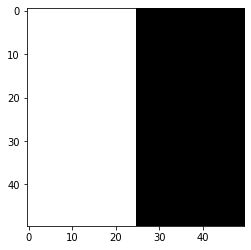

In [11]:
plt.imshow(tf.concat([_X1,_X2],axis=1),cmap='gray')

In [12]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-1.4994335 ,  1.14178473,  0.71103747, ...,  0.45121632,
        -0.92730065,  1.00259235],
       [ 0.30215592, -0.92434633,  1.02168957, ...,  0.63058577,
        -1.03171565, -0.81419678],
       [ 1.88469035,  0.04708497, -0.46601688, ...,  0.4809128 ,
         0.55345481,  0.5988075 ],
       ...,
       [ 1.05154198, -0.21949264,  0.89873666, ...,  0.58016494,
         0.10418315, -1.45269251],
       [ 1.40811858,  0.60528329, -0.19723869, ..., -1.40293283,
         1.67386734, -1.38784729],
       [ 1.09589203, -0.59392903,  0.92308979, ...,  0.71062065,
         1.19756064,  0.65937463]])>

In [13]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise

In [14]:
XXX=XXX.reshape(1,50,50,1) # conv를 위해 shape을 맞춰주었다.

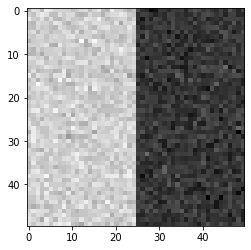

In [15]:
plt.imshow(XXX.reshape(50,50),cmap='gray')

`-` conv layer 생성 

In [17]:
conv = tf.keras.layers.Conv2D(2,(2,2)) 

In [18]:
conv.weights # 처음에는 가중치가 없음 

[]

In [20]:
conv(XXX) # 가중치를 만들기 위해서 XXX를 conv에 한번 통과시킴
conv.weights # 이제 가중치가 생김

[<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
 array([[[[-0.50288284,  0.2487824 ]],
 
         [[-0.27068847, -0.37406996]]],
 
 
        [[[-0.24489376,  0.03335083]],
 
         [[-0.05075628,  0.5841275 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

`-` 가중치의 값을 확인해보자. 

In [21]:
conv.weights[0] # kernel에 해당하는것 

<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
array([[[[-0.50288284,  0.2487824 ]],

        [[-0.27068847, -0.37406996]]],


       [[[-0.24489376,  0.03335083]],

        [[-0.05075628,  0.5841275 ]]]], dtype=float32)>

In [22]:
conv.weights[1] # bias에 해당하는것 

<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

bias가 2개 들어가있네!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUxJVwkcG3p6C963vzaykLcpXUMBFJtGK7CQ&usqp=CAU)

w1 참고 그림

`-` 필터값을 원하는 것으로 변경해보자. 

In [23]:
w0 = [[0.25,0.25],[0.25,0.25]] # 잡티를 제거하는 효과를 준다. (평균이 되니까!)
w1 = [[-1.0,1.0],[-1.0,1.0]] # 경계를 찾기 좋아보이는 필터이다. (엣지검출)

In [24]:
np.array(w0).reshape(2,2,1,1)

array([[[[0.25]],

        [[0.25]]],


       [[[0.25]],

        [[0.25]]]])

In [25]:
np.array(w1).reshape(2,2,1,1)

array([[[[-1.]],

        [[ 1.]]],


       [[[-1.]],

        [[ 1.]]]])

In [26]:
w=np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w

array([[[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]],


       [[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]]])

In [27]:
b= np.array([0.0,0.0])
b

array([0., 0.])

In [28]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

- 첫번째는 평균을 구하는 필터, 
- 두번째는 엣지를 검출하는 필터 

`-` 필터를 넣은 결과를 확인 

채널 2개(1,49,49,2) 나오니까 나눠서 보자

In [29]:
XXX0=conv(XXX)[...,0] # 채널0
XXX0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 9.75504   , 10.487541  , 10.61261   , ...,  0.9340217 ,
         -0.21930355, -0.44265518],
        [10.327396  ,  9.919603  , 10.930278  , ...,  0.6309451 ,
          0.15830944, -0.17341252],
        [ 9.870857  ,  9.726486  , 10.473045  , ...,  0.5480703 ,
          0.4546234 ,  0.23532967],
        ...,
        [10.772679  , 10.920618  , 10.934088  , ..., -0.46006233,
          0.28696376, -0.8030181 ],
        [10.711363  , 10.271822  ,  9.693743  , ..., -1.0189676 ,
          0.23882064, -0.26562232],
        [10.62884   , 10.184301  ,  9.686417  , ..., -0.5479482 ,
          0.54477894,  0.5357388 ]]], dtype=float32)>

In [30]:
XXX1=conv(XXX)[...,1] # 채널1
XXX1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 1.4147167 ,  1.5152884 , -1.0150156 , ..., -1.5724827 ,
         -3.0408185 ,  2.1474118 ],
        [-3.064107  ,  1.4329338 ,  2.609764  , ..., -0.30078316,
         -1.5897593 ,  0.26287156],
        [-2.5716524 ,  1.9941673 ,  0.9920702 , ...,  2.410153  ,
         -2.7839408 ,  1.9067657 ],
        ...,
        [-0.03046417,  0.62222004, -0.56834507, ...,  4.518659  ,
         -1.530555  , -2.8293724 ],
        [-2.0738697 ,  0.3157072 , -2.6280255 , ...,  2.4303343 ,
          2.6008184 , -4.6185904 ],
        [-2.4926558 ,  0.7144966 , -2.7060347 , ...,  0.80716825,
          3.5637403 , -3.5999007 ]]], dtype=float32)>

`-` 각 채널을 시각화 

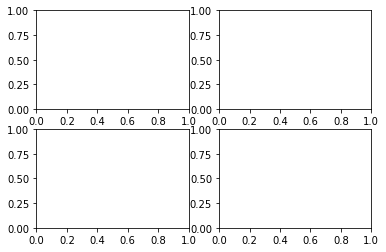

In [36]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [37]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')

In [38]:
ax3.imshow(XXX0.reshape(49,49),cmap='gray')

In [39]:
ax4.imshow(XXX1.reshape(49,49),cmap='gray')

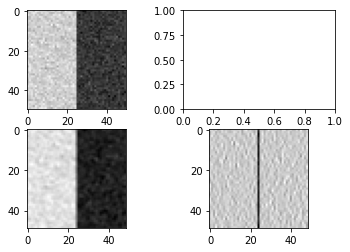

In [40]:
fig

- 2사분면: 원래이미지 
- 3사분면: 원래이미지 -> 평균을 의미하는 conv적용 
- 4사분면: 원래이미지 -> 엣지를 검출하는 conv적용

`-` conv(XXX)의 각 채널에 한 번 더 conv를 통과시켜보자

In [41]:
XXX0.shape, XXX1.shape

(TensorShape([1, 49, 49]), TensorShape([1, 49, 49]))

In [42]:
conv(XXX0.reshape(1,49,49,1))[...,0] ### XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터 
conv(XXX0.reshape(1,49,49,1))[...,1] ### XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터 
conv(XXX1.reshape(1,49,49,1))[...,0] ### XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터 
conv(XXX1.reshape(1,49,49,1))[...,1] ### XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터 

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[  4.5976124 ,  -1.3534737 ,  -2.5089645 , ...,  -8.443421  ,
          -2.7573118 ,   7.0408616 ],
        [  9.0628605 ,   0.17473316,  -9.184645  , ...,   0.05799007,
          -6.48307   ,   6.543338  ],
        [  9.833731  ,  -7.029951  ,  -1.1439972 , ...,   2.0186691 ,
         -10.097098  ,  10.359213  ],
        ...,
        [  1.043313  ,  -0.42036915,  -4.250057  , ...,  10.255383  ,
          -7.148736  ,   0.3711524 ],
        [  3.0422611 ,  -4.134298  ,   4.5457377 , ...,  14.35323   ,
          -5.87873   ,  -8.518227  ],
        [  5.5967293 ,  -6.364264  ,  13.89122   , ...,   7.4165688 ,
           2.927056  , -14.383051  ]]], dtype=float32)>

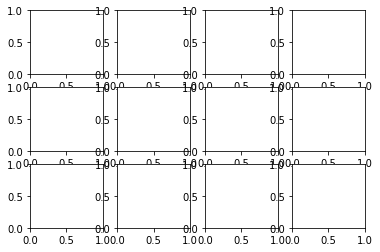

In [43]:
fig,ax =plt.subplots(3,4)

In [44]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래 이미지

In [45]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래 이미지 -> 평균필터 
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래 이미지 -> 엣지필터

In [46]:
ax[2][0].imshow(conv(XXX0.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][1].imshow(conv(XXX0.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터
ax[2][2].imshow(conv(XXX1.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 
ax[2][3].imshow(conv(XXX1.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터

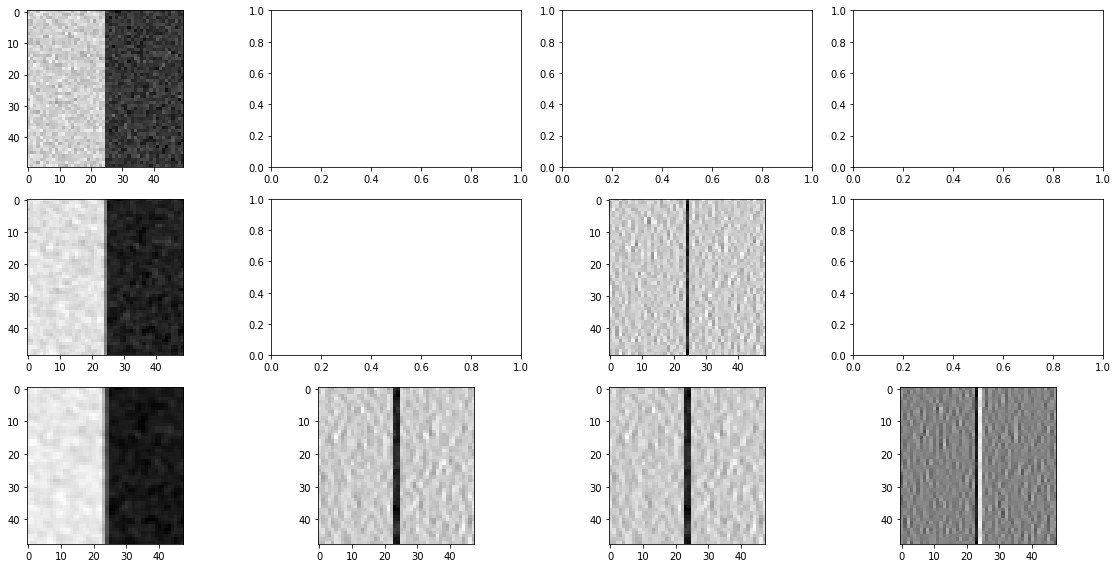

In [47]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

평균 두 번 했더니 희미해지는 거 같아

엣지 두 번하는 것은 의미 없는 것 같아

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 우리는 의미를 알 수 없지만 어떠한 역할을 하는 필터가 만들어질 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있겠다. 
- 채널수를 많이 만들고 다양한 웨이트조합을 실험하다보면 보다 복잡한 이미지의 특징을 추출할 수도 있을 것이다? 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

In [48]:
XXX.shape

TensorShape([1, 50, 50, 1])

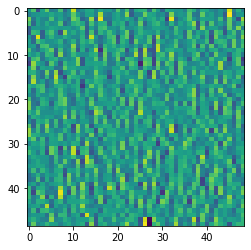

In [49]:
plt.imshow(conv(XXX.reshape(50,50).T.reshape(1,50,50,1))[...,1].reshape(49,49))

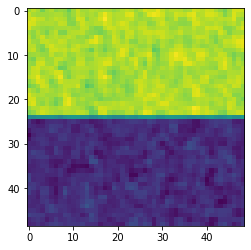

In [50]:
plt.imshow(conv(XXX.reshape(50,50).T.reshape(1,50,50,1))[...,0].reshape(49,49))

- 경계 없는 거랑 있는 거랑은 값을 다 더해서 큰 것만 골라내는 법으로 찾을 수 있음
- 필터를 다르게 설정하면 경계를 다르게 가진 이미지를 구분해낼 수 있다.
    - 경계가 위처럼 등장할 것이니까!
    - 하지만 모든 필터가 이렇게 경계를 구분해 내는 것은 아니야, 우리는 기대를 할 뿐, 그 경계를 찾을 것이라는

`-` 참고: 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다. 

### MAXPOOL

`-` 기본적역할: 이미지의 크기를 줄이는 것 
- 이미지의의 크기를 줄여야하는 이유? 어차피 최종적으로 10차원으로 줄어야하므로 
- 이미지의 크기를 줄이면서도 동시에 아주 크리티컬한 특징은 손실없이 유지하고 싶다~

이미지 크기를 줄여서 계산 덜 하게 하자( 더 빨리 돌아가게, 더 효율적으로)

`-` 점점 작은 이미지가 되면서 중요한 특징들은 살아남지만 그렇지 않으면 죽는다. (캐리커쳐 느낌)

`-` 평균이 아니라 max를 쓴 이유는? 그냥 평균보다 나을것이라고 생각했음.. 
- 그런데 사실은 꼭 그렇지만은 않아서 최근에는 꼭 맥스풀링을 고집하진 않는 추세 (평균풀링도 많이씀) 

특징을 압축하고, ..압축하고..

컴퓨터가 weight를 자동으로 찾는 maxpooling

### CNN 아키텍처의 표현방법

`-` 아래와 같이 아키텍처의 다이어그램 형태로 표현하고 굳이 노드별로 이미지를 그리진 않음

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/2560px-Comparison_image_neural_networks.svg.png)

`-` 물론 아래와 같이 그리는 경우도 있음

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

### Discusstion about CNN 

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원격자), 이미지 (2차원격자)

`-` 실제응용에서 엄청난 성공을 거두었다. 

`-` 이름의 유래는 컨볼루션이라는 수학적 연산을 사용했기 때문 
- 컨볼루션은 조금 특별한 선형변환이다. 

convolution neural network

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다. 

### CNN의 모티브

`-` 희소성 + 매개변수의 공유
- 다소 철학적인 모티브임 
- 희소성: 이미지를 분석하여 특징을 뽑아낼때 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤지역은 엣징을 할 필요가 없이 한채널에서는 엣징만, 다른채널에서는 스무딩만 수행한뒤 여러채널을 조합해서 이해하면 된다. 

DNN에서는 픽셀마다 weight가 다 걸리니까 어느 부분에서 스무딩했는지, 엣징했는지 DNN의 출력결과를 통해 알아낼 수 있다.

`-` 매개변수 공유효과로 인해서 파라메터가 확 줄어든다. 

(예시) (1,6,6,1) -> (1,5,5,2) 
- MLP방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 => 1800개의 매개변수 필요
- CNN은 8개의 매개변수 필요

### CNN 신경망의 기본구조 

`-` 기본유닛 
- conv - activation - pooling
- conv - conv - activation - pooling

## 모형의 성능을 올리기 위한 노력들 

### dropout 

`-` 아래의 예제를 복습하자. 

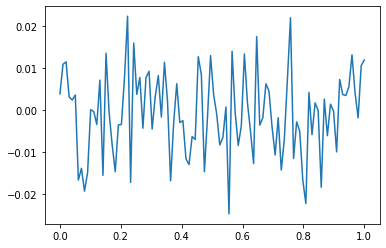

In [51]:
np.random.seed(43052)
x = np.linspace(0,1,100).reshape(100,1)
y = np.random.normal(loc=0,scale=0.01,size=(100,1))
plt.plot(x,y)

추정값이 직선이 나와서 이미 오버피팅이 예상되는 상태

In [54]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x,y,epochs=5000,verbose=0,batch_size=100)

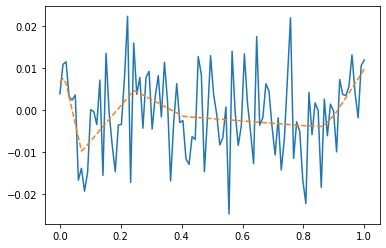

In [55]:
plt.plot(x,y)
plt.plot(x,net(x),'--')

`-` train/test로 나누어서 생각해보자.

In [56]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

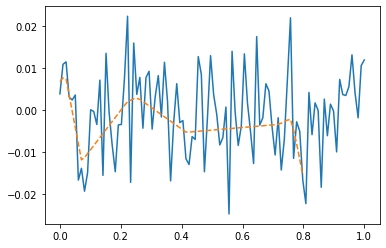

In [57]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')

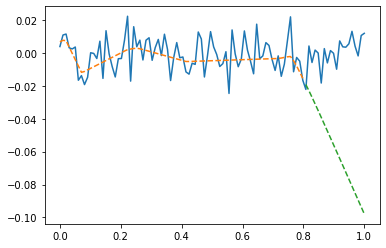

In [58]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

오버피팅의 전형적안 예시

train, val-test 나눈다?
- 조금 훈련하고 예측해보고 조금 훈련하고 예측해보고 이런 식!

- train에서 추세를 따라가는게 좋은게 아니다 $\to$ 그냥 직선으로 핏하는거 이외에는 다 오버핏이다. 

`-` 매 에폭마다 적당히 80%의 노드들을 빼고 학습하자 $\to$ 너무 잘 학습되는 문제는 생기지 않을 것이다 (과적합이 방지될것이다?)

In [59]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dropout(0.8))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

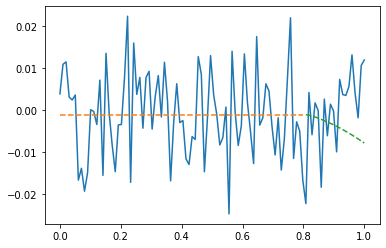

In [60]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

`-` 드랍아웃에 대한 summary
- 직관: 특정노드를 랜덤으로 off시키면 학습이 방해되어 오히려 과적합이 방지되는 효과가 있다 (그렇지만 진짜 중요한 특징이라면 랜덤으로 off 되더라도 어느정도는 학습될 듯)
- note: 드랍아웃을 쓰면 오버핏이 줄어드는건 맞지만 완전히 없어지는건 아니다. 
- note: 오버핏을 줄이는 유일한 방법이 드랍아웃만 있는것도 아니며, 드랍아웃이 오버핏을 줄이는 가장 효과적인 방법도 아니다 (최근에는 dropout보다 batch nomalization을 사용하는 추세임)

중요한 특징은 이렇게 몇 개 빼고 해도 잘 나타날걸???

### train / val / test 

`-` data

In [219]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [220]:
X= x_train.reshape(-1,28,28,1)/255 ## 입력이 0~255 -> 0~1로 표준화 시키는 효과 + float으로 자료형이 바뀜 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28,28,1)/255
yy = tf.keras.utils.to_categorical(y_test)

255로 나누면
- type이 float이 되고
- 0 ~ 255를 0 ~ 1로 표준화도 되고
    - 표준화가 어느정도 되어 있어야 표현력이 높아진다.
    - $255 \times 1$ 보다 $1 \times \frac{1}{255}$가 나음

CNN 말고 DNN으로 받으려고 flatten이랑~
- 이미지니까 categorical_crossentropy 써주자

In [221]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [223]:
x.shape

(100, 1)

20%를 valdation으로 빼서 학습을 시킬 것이다.
- 아래 해석: 뺀 20%의 validation을 제외한 80%으로 학습을 한다.그것으로 20%를 맞춰보니 val_accuracy가 0.8~이러고 나왔다.
- 한 40 정도에서는 끊어져야 하지 않을까? 그 이후에는 val_accuracy가 높아지지 않으니까.
    - 우리의 목표는 val_accuracy가 높아지는 것이니까 끊는게 좋겠다.

In [227]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9749 - val_loss: 0.6305 - val_accuracy: 0.8712
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9747 - val_loss: 0.6487 - val_accuracy: 0.8677
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9771 - val_loss: 0.6159 - val_accuracy: 0.8713
Epoch 4/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9755 - val_loss: 0.6260 - val_accuracy: 0.8702
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9746 - val_loss: 0.6266 - val_accuracy: 0.8721
Epoch 6/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9757 - val_loss: 0.6375 - val_accuracy: 0.8720
Epoch 7/200
240/240 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.9750 - val_loss: 0.6479 - val_accuracy: 0.8692

callback 넣었을 때랑 넣지 않았을때랑 시작하는 accuracy가 달랐다.

이미지니까 loss function `tf.losses.categorical_crossentropy`

`,validation_split=0.2` 20%만큼 validattion 을 val set 으로 뺴내겠다.

한 20 전에는 끊어도 상관없어, 그 이후에는 accuracy 변화가 거의 없다고 해도 무방하니까!

`-` 텐서보드 여는 방법1

In [226]:
%load_ext tensorboard
# 주피터노트북 (혹은 주피터랩)에서 텐서보드를 임베딩하여 넣을 수 있도록 도와주는 매직펑션

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [236]:
#!rm -rf logs
#!kill 313799

주피터랩의 서버로 늘어가는 경우는 IP주소같은 형식의 무엇인가가 필요한가봐

training accuracy는 올라가는데 validation accuracy는 그저 그렇다(우리의 목적이 아님)

training loss는 줄어들고 있는데 validation loss는 오히려 커지고 있다.(이상함을 감지)

-> 오버피팅의 징조!!!

교수님 결과와 다르다....

In [233]:
#
%tensorboard --logdir logs --host 0.0.0.0
# %tensorboard --logdir logs <-- 실습에서는 이렇게 하면됩니다. 

Reusing TensorBoard on port 6006 (pid 701906), started 0:00:05 ago. (Use '!kill 701906' to kill it.)

(참고사항) 파이썬 3.10의 경우 아래의 수정이 필요

`?/python3.10/site-packages/tensorboard/_vendor/html5lib/_trie/_base.py` 을 열고
```python
from collections import Mapping ### 수정전
from collections.abc import Mapping ### 수정후 
```
와 같이 수정한다. 

- 왜냐하면 파이썬 3.10부터 `from collections import Mapping` 가 동작하지 않고 `from collections.abc import Mapping` 가 동작하도록 문법이 바뀜

`-` 텐서보드를 실행하는 방법2

In [231]:
#
!tensorboard --logdir logs --host 0.0.0.0
#!tensorboard --logdir logs
#<-- 실습에서는 이렇게 하면됩니다. 


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.6.0 at http://0.0.0.0:6007/ (Press CTRL+C to quit)
^C


### 조기종료 

`-` 텐서보드를 살펴보니 특정에폭 이후에는 오히려 과적합이 진행되는 듯 하다 (학습할수록 손해인듯 하다) $\to$ 그 특정에폭까지만 학습해보자

In [237]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듦 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

val-loss 가 한 번 올라간다? 즉, 그래프가 상승해서 멈춘다! 는 뜻! 오목한 부분이 끝날때마다!

In [100]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회 증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 2s 6ms/step - loss: 0.5493 - accuracy: 0.8127 - val_loss: 0.4113 - val_accuracy: 0.8497
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.3571 - accuracy: 0.8673 - val_loss: 0.3793 - val_accuracy: 0.8649
Epoch 3/200
240/240 [==============================] - 1s 6ms/step - loss: 0.3254 - accuracy: 0.8791 - val_loss: 0.3679 - val_accuracy: 0.8677
Epoch 4/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2978 - accuracy: 0.8869 - val_loss: 0.3498 - val_accuracy: 0.8791
Epoch 5/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2794 - accuracy: 0.8960 - val_loss: 0.3341 - val_accuracy: 0.8791
Epoch 6/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2618 - accuracy: 0.9001 - val_loss: 0.3264 - val_accuracy: 0.8827
Epoch 7/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2472 - accuracy: 0.9066 - val_loss: 0.3363 - val_accuracy: 0.8802

In [101]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2388 - accuracy: 0.9080 - val_loss: 0.3112 - val_accuracy: 0.8863
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2245 - accuracy: 0.9143 - val_loss: 0.3266 - val_accuracy: 0.8887


In [102]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2164 - accuracy: 0.9161 - val_loss: 0.3316 - val_accuracy: 0.8876
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2010 - accuracy: 0.9223 - val_loss: 0.3334 - val_accuracy: 0.8884


In [103]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 6ms/step - loss: 0.1909 - accuracy: 0.9257 - val_loss: 0.3789 - val_accuracy: 0.8819
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.1864 - accuracy: 0.9275 - val_loss: 0.3458 - val_accuracy: 0.8890
Epoch 3/200
240/240 [==============================] - 1s 6ms/step - loss: 0.1852 - accuracy: 0.9290 - val_loss: 0.3508 - val_accuracy: 0.8903


In [104]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 2s 6ms/step - loss: 0.1653 - accuracy: 0.9339 - val_loss: 0.3870 - val_accuracy: 0.8848
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.1574 - accuracy: 0.9383 - val_loss: 0.3708 - val_accuracy: 0.8921
Epoch 3/200
240/240 [==============================] - 1s 6ms/step - loss: 0.1558 - accuracy: 0.9390 - val_loss: 0.3727 - val_accuracy: 0.8890


`-` 몇 번 좀 참았다가 멈추면 좋겠다. 

In [238]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [239]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=5) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 2s 6ms/step - loss: 0.5489 - accuracy: 0.8131 - val_loss: 0.4094 - val_accuracy: 0.8514
Epoch 2/200
240/240 [==============================] - 1s 6ms/step - loss: 0.3556 - accuracy: 0.8681 - val_loss: 0.3624 - val_accuracy: 0.8708
Epoch 3/200
240/240 [==============================] - 1s 6ms/step - loss: 0.3206 - accuracy: 0.8796 - val_loss: 0.3538 - val_accuracy: 0.8715
Epoch 4/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2952 - accuracy: 0.8889 - val_loss: 0.3466 - val_accuracy: 0.8776
Epoch 5/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2775 - accuracy: 0.8963 - val_loss: 0.3236 - val_accuracy: 0.8822
Epoch 6/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2600 - accuracy: 0.9015 - val_loss: 0.3257 - val_accuracy: 0.8818
Epoch 7/200
240/240 [==============================] - 1s 6ms/step - loss: 0.2449 - accuracy: 0.9080 - val_loss: 0.3098 - val_accuracy: 0.8875

`-` 텐서보드로 그려보자?

텐서보드 기능이 없는 상태

In [240]:
#
%tensorboard --logdir logs --host 0.0.0.0 
# 아무것도 안나온다 -> 왜? cb1을 써야 텐서보드가 나옴

조기종료cb2와 텐서플로우show cb1을 함께 써서 안 보이는 문제가 생겨버렸다.

`-` 조기종료와 텐서보드를 같이 쓰려면?

In [242]:
#!rm -rf logs

In [243]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu')) 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [244]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=7) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/200
240/240 [==============================] - 1s 5ms/step - loss: 0.7184 - accuracy: 0.7581 - val_loss: 0.5077 - val_accuracy: 0.8276
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.8386 - val_loss: 0.4793 - val_accuracy: 0.8342
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8517 - val_loss: 0.4386 - val_accuracy: 0.8497
Epoch 4/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8582 - val_loss: 0.4029 - val_accuracy: 0.8603
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8669 - val_loss: 0.3932 - val_accuracy: 0.8619
Epoch 6/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3697 - accuracy: 0.8705 - val_loss: 0.3842 - val_accuracy: 0.8657
Epoch 7/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3569 - accuracy: 0.8759 - val_loss: 0.3844 - val_accuracy: 0.8668

결과 해석
- training accuracy가 validation accuracy보다 높다?
- training loss가 validation loss보다 낮다?

In [245]:
# 
# 조기종료가 구현된 그림이 출력
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 702426), started 0:01:48 ago. (Use '!kill 702426' to kill it.)

### 하이퍼파라메터 선택

`-` 하이퍼파라메터 설정

여러 상황에서 반복 실험시 유용

In [247]:
from tensorboard.plugins.hparams import api as hp

In [133]:
a=net.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3817 - accuracy: 0.8706


In [134]:
type(a)

list

In [135]:
a

[0.3817201852798462, 0.8705999851226807]

`_rslt=net.evaluate(XX,yy)`
- test의 해당되는 evaluate

`_mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  `
- 내가 보고 싶은 것은 recall
- test의 accuracy 가 rsit[1]에 있어
- test의 recall이 rsit[2]
- 가중 평균을 보겠다, 이건 정해진거는 아니고 마음대로..

with문이 있다는 건 들어갈때 나갈때가 정의되어 있다는 거

In [253]:
!rm -rf logs
for u in [50,5000]: 
    for d in [0.0,0.5]: 
        for o in ['adam','sgd']:
            logdir = 'logs/hpguebin_{}_{}_{}'.format(u,d,o)
            with tf.summary.create_file_writer(logdir).as_default():
                net = tf.keras.Sequential()
                net.add(tf.keras.layers.Flatten())
                net.add(tf.keras.layers.Dense(u,activation='relu'))
                net.add(tf.keras.layers.Dropout(d))
                net.add(tf.keras.layers.Dense(10,activation='softmax'))
                net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
                cb3 = hp.KerasCallback(logdir, {'유닛수':u, '드랍아웃비율':d, '옵티마이저':o})
                net.fit(X,y,epochs=3,callbacks=cb3)
                _rslt=net.evaluate(XX,yy)
                _mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  
                tf.summary.scalar('애큐러시와리컬의가중평균(테스트셋)', _mymetric, step=1) 

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5364 - accuracy: 0.8143 - recall: 0.7509
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4072 - accuracy: 0.8559 - recall: 0.8242
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.4010 - accuracy: 0.8572 - recall: 0.8301
Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7590 - accuracy: 0.7494 - recall: 0.5859
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5225 - accuracy: 0.8223 - recall: 0.7521
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.4910 - accuracy: 0.8274 - recall: 0.7813
Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7480 - accuracy: 0.7374 - recall: 0.6156
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5666 - accuracy: 0.7983 - recall: 0.7225
Epoch 3/3
313/313 [==============================] - 1s 4ms/

opt가 adma일 때보다 sgd 일때

In [255]:
#
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 704607), started 0:02:40 ago. (Use '!kill 704607' to kill it.)

## 숙제

`-` 아래의 네트워크에서 옵티마이저를 adam, sgd를 선택하여 각각 적합시켜보고 testset의 loss를 성능비교를 하라. epoch은 5정도로 설정하라. 
```
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer=???,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
```

`-` adam 적합

In [257]:
!rm -rf logs
tf.random.set_seed(202150754)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(50,activation='relu'))
net1.add(tf.keras.layers.Dense(50,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])

In [258]:
net1.fit(X,y,epochs=5,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/5
240/240 [==============================] - 2s 6ms/step - loss: 0.7224 - accuracy: 0.7586 - recall: 0.6304 - val_loss: 0.4817 - val_accuracy: 0.8329 - val_recall: 0.7788
Epoch 2/5
240/240 [==============================] - 1s 5ms/step - loss: 0.4508 - accuracy: 0.8419 - recall: 0.7951 - val_loss: 0.4497 - val_accuracy: 0.8349 - val_recall: 0.7932
Epoch 3/5
240/240 [==============================] - 1s 5ms/step - loss: 0.4064 - accuracy: 0.8567 - recall: 0.8202 - val_loss: 0.4013 - val_accuracy: 0.8540 - val_recall: 0.8188
Epoch 4/5
240/240 [==============================] - 1s 5ms/step - loss: 0.3728 - accuracy: 0.8685 - recall: 0.8364 - val_loss: 0.3892 - val_accuracy: 0.8611 - val_recall: 0.8289
Epoch 5/5
240/240 [==============================] - 1s 5ms/step - loss: 0.3571 - accuracy: 0.8714 - recall: 0.8434 - val_loss: 0.3857 - val_accuracy: 0.8620 - val_recall: 0.8403


`-` adam tensorboard

In [260]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 704910), started 0:00:07 ago. (Use '!kill 704910' to kill it.)

`-` sgd 적합

In [262]:
!rm -rf logs
tf.random.set_seed(202150754)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(50,activation='relu'))
net2.add(tf.keras.layers.Dense(50,activation='relu'))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='sgd',loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])

In [263]:
net2.fit(X,y,epochs=5,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/5
240/240 [==============================] - 2s 6ms/step - loss: 1.6588 - accuracy: 0.4999 - recall: 0.0831 - val_loss: 1.1223 - val_accuracy: 0.6730 - val_recall: 0.2842
Epoch 2/5
240/240 [==============================] - 1s 5ms/step - loss: 0.9301 - accuracy: 0.6911 - recall: 0.4377 - val_loss: 0.8035 - val_accuracy: 0.7196 - val_recall: 0.5241
Epoch 3/5
240/240 [==============================] - 1s 5ms/step - loss: 0.7534 - accuracy: 0.7372 - recall: 0.5661 - val_loss: 0.7023 - val_accuracy: 0.7613 - val_recall: 0.6117
Epoch 4/5
240/240 [==============================] - 1s 5ms/step - loss: 0.6757 - accuracy: 0.7693 - recall: 0.6336 - val_loss: 0.6443 - val_accuracy: 0.7802 - val_recall: 0.6617
Epoch 5/5
240/240 [==============================] - 1s 5ms/step - loss: 0.6253 - accuracy: 0.7891 - recall: 0.6790 - val_loss: 0.6030 - val_accuracy: 0.7968 - val_recall: 0.6976


`-` sgd tensorboard

In [270]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 705235), started 0:06:19 ago. (Use '!kill 705235' to kill it.)

In [271]:
net1.evaluate(XX,yy)[0]

313/313 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8543 - recall: 0.8275


0.41707104444503784

In [272]:
net2.evaluate(XX,yy)[0]

313/313 [==============================] - 1s 4ms/step - loss: 0.6277 - accuracy: 0.7835 - recall: 0.6898


0.627724289894104

`adam`을 optimizer로 선택하였을때 loss는 `0.41707104444503784`이었으며,

`sgd`를 optimizer로 선택하였을때 loss는 `0.6277242302894592`이었다.

loss값만 보았을때는 `adam`이 `sgd`보다 낮았다.

`adam`은 trianing loss와 validation loss가 같은 수준까지 낮아지는 모습이지만,

`sgd`는 training loss보다 validation loss가 더 낮은 수준까지 loss가 떨어졌다.

opptimizer로 `sgd`를 적합시켰을때, 20%의 validation을 제외한 80%으로 학습을 한 것보다 20%의 validation의 loss가 더 낮았다는 원하는 결과가 도출되었다.